In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Input data files are availabe in the "houseprice.csv" directory
df = pd.read_csv('house_prices.csv')


In [67]:
#display head()
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,6181.0,New York,NY,New York,Queens,1.0,NaN,NaN,NaN,NaN,...,576300.0,580500.0,585100.0,590400.0,596000.0,602400.0,608500.0,615000.0,621200.0,626600.0
1,12447.0,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2.0,155000.0,154600.0,154400.0,154200.0,...,572600.0,577600.0,581800.0,584900.0,587400.0,590000.0,593000.0,598300.0,604900.0,610400.0
2,17426.0,Chicago,IL,Chicago,Cook,3.0,109700.0,109400.0,109300.0,109300.0,...,205000.0,206000.0,205800.0,205700.0,206800.0,208000.0,208800.0,210400.0,212400.0,214100.0
3,13271.0,Philadelphia,PA,Philadelphia,Philadelphia,4.0,50000.0,49900.0,49600.0,49400.0,...,125000.0,125700.0,125800.0,126800.0,129000.0,130900.0,131600.0,132000.0,132500.0,133200.0
4,40326.0,Phoenix,AZ,Phoenix,Maricopa,5.0,87200.0,87700.0,88200.0,88400.0,...,190100.0,191400.0,192900.0,195200.0,197400.0,198700.0,199600.0,201100.0,202900.0,204500.0


In [69]:
#let's get the number of attributes and instances data point
instance_count, attr_count = df.shape
print('Number of instances: ', instance_count)
print('Number of features: ', attr_count)

Number of instances:  10425
Number of features:  255


### Distributions of each attributes
let's begin by exploring our dataset attributes (columns)

In [70]:
df.columns

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11', '2016-12'],
      dtype='object', length=255)

#### Statistical overview

In [71]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
count,10425.000000,10425.000000,7.479000e+03,7.574000e+03,7.610000e+03,7.612000e+03,7.620000e+03,7.620000e+03,7.620000e+03,7.627000e+03,...,1.040600e+04,1.040600e+04,1.040600e+04,1.042500e+04,1.042500e+04,1.042500e+04,1.042500e+04,1.042500e+04,1.042500e+04,1.040900e+04
mean,85869.318688,5212.500000,1.217134e+05,1.217784e+05,1.216544e+05,1.217169e+05,1.217845e+05,1.218901e+05,1.220440e+05,1.223470e+05,...,2.380083e+05,2.390398e+05,2.399747e+05,2.408614e+05,2.416046e+05,2.426240e+05,2.440774e+05,2.457590e+05,2.474649e+05,2.490089e+05
std,127213.478767,3009.149589,8.038321e+04,7.985678e+04,7.976917e+04,7.983565e+04,7.982927e+04,7.988671e+04,8.002210e+04,8.023397e+04,...,2.689106e+05,2.694635e+05,2.691853e+05,2.678607e+05,2.674186e+05,2.682988e+05,2.704746e+05,2.733353e+05,2.763300e+05,2.785896e+05
min,3305.000000,1.000000,1.880000e+04,1.880000e+04,1.880000e+04,1.910000e+04,1.960000e+04,2.000000e+04,2.060000e+04,2.080000e+04,...,3.020000e+04,3.100000e+04,3.160000e+04,3.170000e+04,3.150000e+04,3.230000e+04,3.350000e+04,3.440000e+04,3.450000e+04,3.450000e+04
25%,19498.000000,2607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.226000e+05,1.230000e+05,1.235000e+05,1.241000e+05,1.249000e+05,1.257000e+05,NaN
50%,35777.000000,5212.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.751000e+05,1.757000e+05,1.765000e+05,1.771000e+05,1.784000e+05,1.795000e+05,NaN
75%,52767.000000,7818.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.717000e+05,2.728000e+05,2.737000e+05,2.750000e+05,2.764000e+05,2.778000e+05,NaN
max,737791.000000,10424.000000,2.574500e+06,2.553100e+06,2.541500e+06,2.531700e+06,2.526600e+06,2.530400e+06,2.535100e+06,2.543800e+06,...,1.078250e+07,1.080000e+07,1.077520e+07,1.073020e+07,1.078860e+07,1.091830e+07,1.101350e+07,1.110910e+07,1.128480e+07,1.142260e+07


### Missing is bad :(
Well, we can see from the above cell we have some missing data values and this are represented by np.NaN. We can use pd.isnull(df).any() to get overview of what we are missing

In [72]:
pd.isnull(df).any()

RegionID      False
RegionName     True
State          True
Metro          True
CountyName     True
SizeRank      False
1996-04        True
1996-05        True
1996-06        True
1996-07        True
1996-08        True
1996-09        True
1996-10        True
1996-11        True
1996-12        True
1997-01        True
1997-02        True
1997-03        True
1997-04        True
1997-05        True
1997-06        True
1997-07        True
1997-08        True
1997-09        True
1997-10        True
1997-11        True
1997-12        True
1998-01        True
1998-02        True
1998-03        True
              ...  
2014-07       False
2014-08       False
2014-09       False
2014-10       False
2014-11       False
2014-12       False
2015-01       False
2015-02       False
2015-03       False
2015-04       False
2015-05       False
2015-06       False
2015-07       False
2015-08       False
2015-09       False
2015-10       False
2015-11       False
2015-12       False
2016-01       False


In [73]:
#Let's count the missing values in our data
pd.isnull(df).sum()

RegionID         0
RegionName       1
State            1
Metro          587
CountyName       1
SizeRank         0
1996-04       2946
1996-05       2851
1996-06       2815
1996-07       2813
1996-08       2805
1996-09       2805
1996-10       2805
1996-11       2798
1996-12       2798
1997-01       2777
1997-02       2347
1997-03       2306
1997-04       2305
1997-05       2305
1997-06       2304
1997-07       2304
1997-08       2181
1997-09       2178
1997-10       2175
1997-11       2172
1997-12       2171
1998-01       2155
1998-02       2012
1998-03       2012
              ... 
2014-07          0
2014-08          0
2014-09          0
2014-10          0
2014-11          0
2014-12          0
2015-01          0
2015-02          0
2015-03          0
2015-04          0
2015-05          0
2015-06          0
2015-07          0
2015-08          0
2015-09          0
2015-10          0
2015-11          0
2015-12          0
2016-01          0
2016-02         19
2016-03         19
2016-04     

### Missing data fillna
Before we can fill the missing data with the column average, let's see the average for each columns

In [74]:
df.mean()

RegionID     85869.318688
SizeRank      5212.500000
1996-04     121713.439422
1996-05     121778.370527
1996-06     121654.369825
1996-07     121716.896597
1996-08     121784.499278
1996-09     121890.143063
1996-10     122043.955900
1996-11     122346.957776
1996-12     122658.248099
1997-01     123116.372434
1997-02     123664.169865
1997-03     124337.102735
1997-04     124693.238084
1997-05     125045.756867
1997-06     125424.310345
1997-07     125859.421182
1997-08     126025.318452
1997-09     126520.894979
1997-10     127000.460662
1997-11     127563.063500
1997-12     128175.960257
1998-01     128858.350466
1998-02     129414.158345
1998-03     130104.232049
1998-04     130156.282785
1998-05     129758.302047
1998-06     130131.016108
1998-07     132131.305988
                ...      
2014-07     219786.703761
2014-08     220575.834612
2014-09     221267.325403
2014-10     221946.556025
2014-11     222613.152341
2014-12     223247.563315
2015-01     223943.812356
2015-02     

In [75]:
#Now let's fill with means on numerical attributes
df.fillna(df.mean())

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,6181.000000,New York,NY,New York,Queens,1.0,121713.439422,121778.370527,121654.369825,121716.896597,...,5.763000e+05,5.805000e+05,5.851000e+05,5.904000e+05,5.960000e+05,6.024000e+05,6.085000e+05,6.150000e+05,6.212000e+05,6.266000e+05
1,12447.000000,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2.0,155000.000000,154600.000000,154400.000000,154200.000000,...,5.726000e+05,5.776000e+05,5.818000e+05,5.849000e+05,5.874000e+05,5.900000e+05,5.930000e+05,5.983000e+05,6.049000e+05,6.104000e+05
2,17426.000000,Chicago,IL,Chicago,Cook,3.0,109700.000000,109400.000000,109300.000000,109300.000000,...,2.050000e+05,2.060000e+05,2.058000e+05,2.057000e+05,2.068000e+05,2.080000e+05,2.088000e+05,2.104000e+05,2.124000e+05,2.141000e+05
3,13271.000000,Philadelphia,PA,Philadelphia,Philadelphia,4.0,50000.000000,49900.000000,49600.000000,49400.000000,...,1.250000e+05,1.257000e+05,1.258000e+05,1.268000e+05,1.290000e+05,1.309000e+05,1.316000e+05,1.320000e+05,1.325000e+05,1.332000e+05
4,40326.000000,Phoenix,AZ,Phoenix,Maricopa,5.0,87200.000000,87700.000000,88200.000000,88400.000000,...,1.901000e+05,1.914000e+05,1.929000e+05,1.952000e+05,1.974000e+05,1.987000e+05,1.996000e+05,2.011000e+05,2.029000e+05,2.045000e+05
5,18959.000000,Las Vegas,NV,Las Vegas,Clark,6.0,121600.000000,120900.000000,120400.000000,120300.000000,...,1.934000e+05,1.948000e+05,1.957000e+05,1.979000e+05,2.008000e+05,2.029000e+05,2.040000e+05,2.054000e+05,2.067000e+05,2.078000e+05
6,54296.000000,San Diego,CA,San Diego,San Diego,7.0,161100.000000,160700.000000,160400.000000,160100.000000,...,5.290000e+05,5.308000e+05,5.325000e+05,5.348000e+05,5.388000e+05,5.430000e+05,5.457000e+05,5.474000e+05,5.498000e+05,5.528000e+05
7,38128.000000,Dallas,TX,Dallas-Fort Worth,Dallas,8.0,121713.439422,121778.370527,121654.369825,121716.896597,...,1.419000e+05,1.436000e+05,1.448000e+05,1.483000e+05,1.532000e+05,1.561000e+05,1.569000e+05,1.581000e+05,1.592000e+05,1.603000e+05
8,33839.000000,San Jose,CA,San Jose,Santa Clara,9.0,224500.000000,224900.000000,225400.000000,226100.000000,...,8.330000e+05,8.395000e+05,8.404000e+05,8.379000e+05,8.344000e+05,8.337000e+05,8.368000e+05,8.406000e+05,8.432000e+05,8.459000e+05
9,25290.000000,Jacksonville,FL,Jacksonville,Duval,10.0,77500.000000,77200.000000,76800.000000,76600.000000,...,1.348000e+05,1.361000e+05,1.374000e+05,1.382000e+05,1.385000e+05,1.392000e+05,1.407000e+05,1.425000e+05,1.442000e+05,1.454000e+05


### Corelations between our data

By definition, correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. A positive corelation shows the extent to which two variables increase or decrease in parallel, a negative corelations indicates the extent to which one variable increase as the other decreases.

For our dataset, it is imporpant to have a better understanding of the uderlying structure and characteristics of the data and leads to better intuition in knowing whether some parirs of attributes are correlated and how much.

To begin, pandas Dataframe has a .corr() function that has three various correlation coefficients: standard Person correlation coefficient, Kendall Tau correlation coefficient, and Sperman rank correlation.

#### Pearson correlation coeffiecient

This is simple method for understanding a feature's relation to the response variable. The values lies in [-1,1]

-1 meaning perfect negative correlation (as one variable increases, other         decrease)

1 meaning perfect positive correlation

0 meaning no linear correlation between the two variables

In [77]:
pearson = df.corr(method='pearson')
pearson

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
RegionID,1.000000,0.049100,-0.015688,-0.014301,-0.017035,-0.017825,-0.018117,-0.018387,-0.018790,-0.019506,...,-0.031501,-0.031939,-0.032303,-0.032299,-0.032354,-0.032604,-0.032934,-0.033173,-0.033328,-0.033750
SizeRank,0.049100,1.000000,-0.102167,-0.100794,-0.101878,-0.102336,-0.102525,-0.102563,-0.102707,-0.102992,...,-0.099532,-0.099894,-0.100433,-0.101343,-0.101883,-0.101986,-0.101697,-0.101140,-0.100274,-0.099411
1996-04,-0.015688,-0.102167,1.000000,0.999772,0.999272,0.998707,0.998189,0.997779,0.997402,0.997029,...,0.903712,0.903692,0.903623,0.903555,0.903486,0.903878,0.904393,0.904186,0.903735,0.903291
1996-05,-0.014301,-0.100794,0.999772,1.000000,0.999821,0.999418,0.998983,0.998623,0.998277,0.997923,...,0.904378,0.904351,0.904283,0.904215,0.904142,0.904528,0.905039,0.904837,0.904397,0.903960
1996-06,-0.017035,-0.101878,0.999272,0.999821,1.000000,0.999855,0.999555,0.999258,0.998955,0.998630,...,0.904706,0.904672,0.904598,0.904534,0.904465,0.904846,0.905348,0.905149,0.904714,0.904281
1996-07,-0.017825,-0.102336,0.998707,0.999418,0.999855,1.000000,0.999896,0.999682,0.999420,0.999128,...,0.904729,0.904686,0.904603,0.904539,0.904473,0.904851,0.905352,0.905163,0.904746,0.904328
1996-08,-0.018117,-0.102525,0.998189,0.998983,0.999555,0.999896,1.000000,0.999919,0.999723,0.999474,...,0.904846,0.904801,0.904710,0.904648,0.904588,0.904968,0.905467,0.905288,0.904887,0.904484
1996-09,-0.018387,-0.102563,0.997779,0.998623,0.999258,0.999682,0.999919,1.000000,0.999925,0.999744,...,0.905174,0.905130,0.905033,0.904974,0.904925,0.905306,0.905800,0.905613,0.905206,0.904801
1996-10,-0.018790,-0.102707,0.997402,0.998277,0.998955,0.999420,0.999723,0.999925,1.000000,0.999930,...,0.905740,0.905696,0.905590,0.905529,0.905481,0.905857,0.906340,0.906142,0.905722,0.905309
1996-11,-0.019506,-0.102992,0.997029,0.997923,0.998630,0.999128,0.999474,0.999744,0.999930,1.000000,...,0.905761,0.905723,0.905618,0.905558,0.905512,0.905888,0.906371,0.906176,0.905770,0.905374


#### Let's back peddle a sec,
Know we got our correlation. We want to see how each input attribute is able to predict the target 'price' 

In [78]:
corr_with_target = pearson.ix[-1][:-1]

corr_with_dict_taget = corr_with_target.to_dict()

#predictive by their correlation with sale price
print("Columns \tCorrelation")
for cols in sorted(corr_with_dict_taget.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*cols))

Columns 	Correlation
2016-11: 	0.999935223728269
2016-10: 	0.9996914118788427
2016-09: 	0.999374497379727
2016-08: 	0.9991318263420749
2016-07: 	0.9990035398292044
2016-06: 	0.9988176288950616
2016-05: 	0.998567261797967
2016-04: 	0.9983312234053869
2016-03: 	0.9981085705713809
2016-02: 	0.997978601513874
2016-01: 	0.9979232117276827
2015-12: 	0.9978287482755905
2015-11: 	0.9976556835870949
2015-10: 	0.9974738106644583
2015-09: 	0.9972935730892909
2015-08: 	0.9971852739077186
2015-07: 	0.9971069915297455
2015-06: 	0.9969526958672187
2015-05: 	0.9967131302913426
2015-04: 	0.9964147817945745
2015-03: 	0.9960221785651352
2015-02: 	0.9955369183245966
2015-01: 	0.9950811733212781
2014-12: 	0.994832530467401
2014-11: 	0.9946309527452998
2014-10: 	0.9943033053134841
2014-09: 	0.9937922571381618
2014-08: 	0.9932098479984981
2014-07: 	0.9926536214197318
2014-06: 	0.9922433667550529
2014-05: 	0.991961777738661
2014-04: 	0.9916491607696887
2014-03: 	0.9913341727785906
2014-02: 	0.9910571682788385

In [79]:
corr_with_target[abs(corr_with_target).argsort()[::1]]

RegionID   -0.033750
SizeRank   -0.099411
1996-04     0.903291
1996-05     0.903960
1996-06     0.904281
1996-07     0.904328
1996-08     0.904484
1996-09     0.904801
1996-10     0.905309
1996-11     0.905374
1996-12     0.906249
1997-01     0.907347
1997-04     0.911556
1997-03     0.911605
1997-05     0.911963
1997-02     0.911971
1997-06     0.912785
1997-07     0.913960
1997-08     0.916053
1997-09     0.917167
1997-10     0.918315
1997-11     0.919635
1997-12     0.921133
1998-05     0.922835
1998-01     0.922873
1998-06     0.923924
1998-02     0.924380
1998-03     0.925066
1998-04     0.925190
1998-07     0.927976
              ...   
2014-06     0.992243
2014-07     0.992654
2014-08     0.993210
2014-09     0.993792
2014-10     0.994303
2014-11     0.994631
2014-12     0.994833
2015-01     0.995081
2015-02     0.995537
2015-03     0.996022
2015-04     0.996415
2015-05     0.996713
2015-06     0.996953
2015-07     0.997107
2015-08     0.997185
2015-09     0.997294
2015-10     0

--> Let's also understand the correlation between attribute pairs

In [81]:
#get all attrs expect target
attrs = pearson.iloc[:-1,:-1]

#It's important to target correlations only
threshold = 0.5

another_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), another_corrs[key])
for key in another_corrs])), columns=['Attribute Pair', 'Correlation'])

unique_corrs = unique_corrs.ix[abs(unique_corrs['Correlation']).argsort()[::-1]]

unique_corrs

,Attribute Pair,Correlation
18627,"(2016-02, 2016-03)",0.999959
27905,"(2014-01, 2014-02)",0.999958
15594,"(2016-01, 2016-02)",0.999957
8113,"(2014-02, 2014-03)",0.999955
8581,"(2014-11, 2014-12)",0.999953
5226,"(2015-10, 2015-11)",0.999953
6753,"(2011-11, 2011-12)",0.999952
20541,"(2015-11, 2015-12)",0.999952
13081,"(2016-03, 2016-04)",0.999951
6879,"(2015-09, 2015-10)",0.999951


### Time to see what we have done!

Let's see the above cells with some graphs. We can try on 2d matrix first.

In [83]:
!pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\saleban.olow\AppData\Local\pip\Cache\wheels\cb\c8\67\83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [84]:
import seaborn as sns

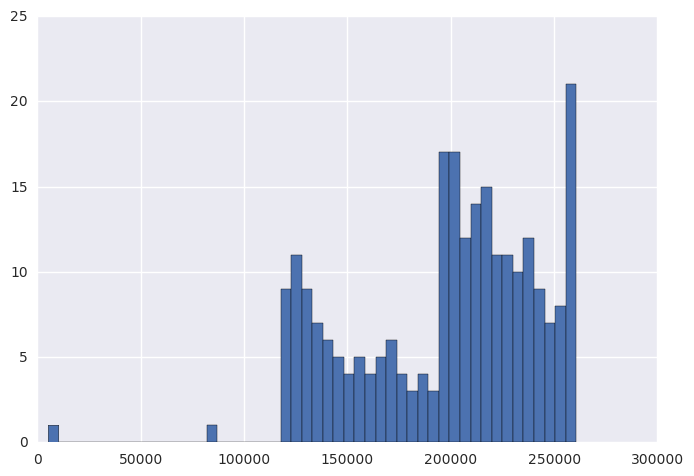

In [98]:
target = df.mean()
plt.hist(target,bins=50)
plt.show()

To understand the data more clear, we can use the displot() function, which offers a smoothed histogram with a kernal density estimation.

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


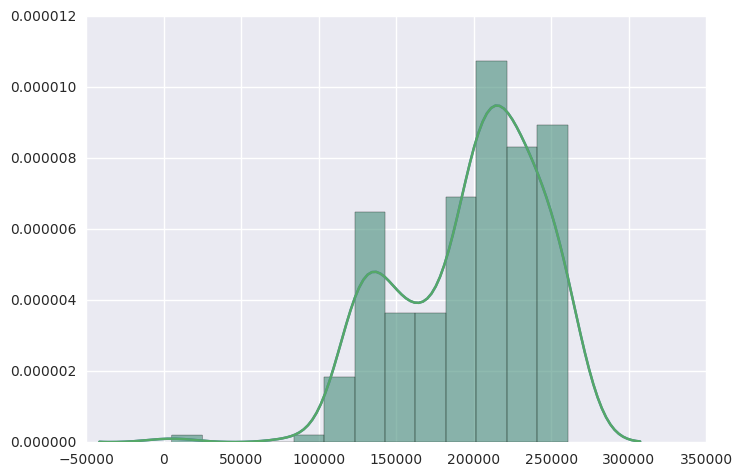

In [100]:
sns.distplot(target)
plt.show()

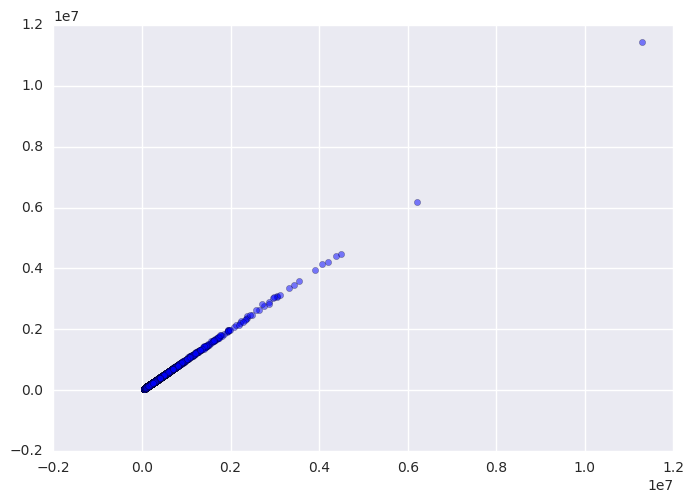

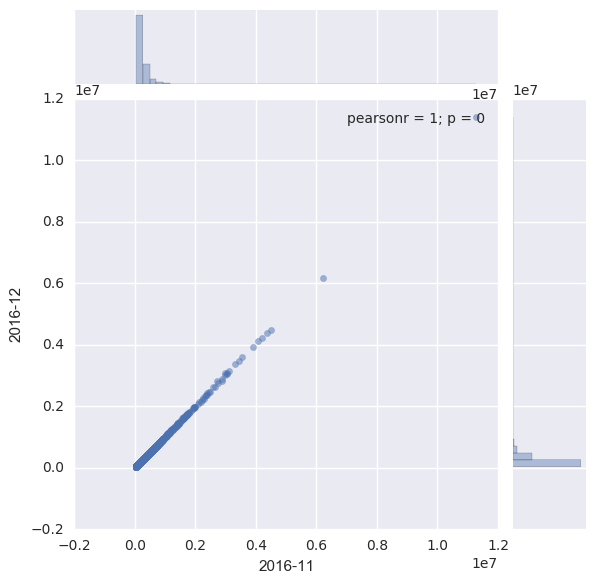

In [111]:
#scatter plot
x, y = df['2016-11'], df['2016-12']
plt.scatter(x,y,alpha=0.5)

#jointplot with histograms 
sns.jointplot(x,y,kind='scatter',joint_kws={'alpha':0.5})
plt.show()